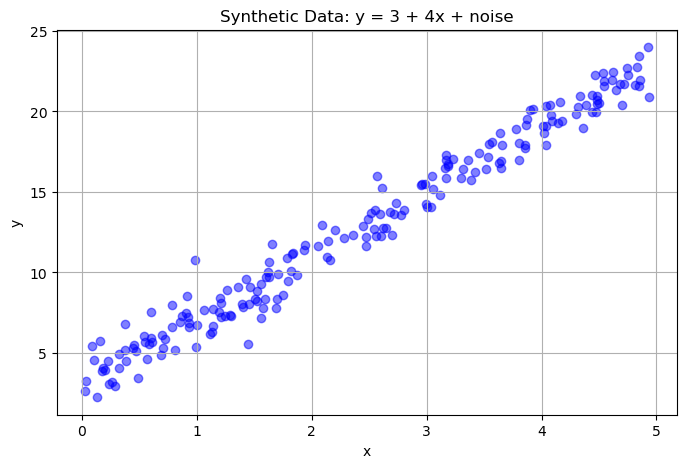

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Generate synthetic data
# -------------------------------

# Set random seed for reproducibility
np.random.seed(42)

# Generate 200 samples of x uniformly between 0 and 5
x = np.random.uniform(0, 5, 200)

# Generate Gaussian noise (mean=0, std=1)
epsilon = np.random.normal(0, 1, 200)

# Define the true relationship: y = 3 + 4x + noise
y = 3 + 4 * x + epsilon

# Add a bias column (1s) to X for intercept term
X = np.vstack([np.ones_like(x), x]).T

# Plot the raw data
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, color='blue')
plt.title("Synthetic Data: y = 3 + 4x + noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


Closed-form Solution:
Intercept = 3.1052, Slope = 3.9844


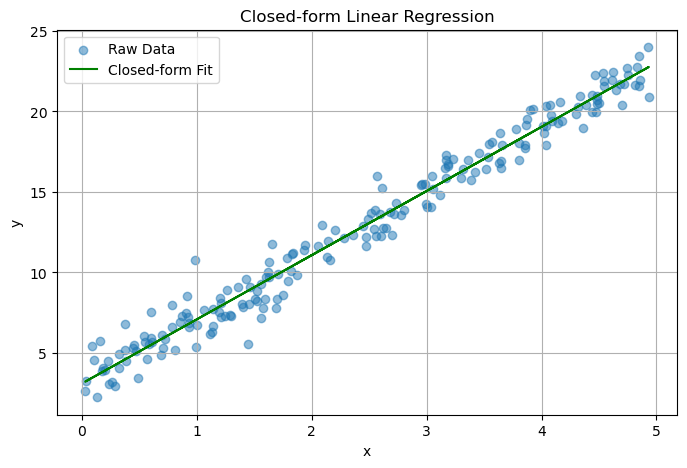

In [3]:
# -----------------------------------
# Step 2: Closed-form solution
# -----------------------------------

# Apply the Normal Equation: θ = (XᵀX)⁻¹ Xᵀy
theta_closed = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract intercept and slope
intercept_closed, slope_closed = theta_closed

# Print the estimated parameters
print(f"Closed-form Solution:\nIntercept = {intercept_closed:.4f}, Slope = {slope_closed:.4f}")

# Plot the fitted line using closed-form solution
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, label='Raw Data')
plt.plot(x, X @ theta_closed, color='green', label='Closed-form Fit')
plt.title("Closed-form Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# -----------------------------------
# Step 3: Gradient Descent
# -----------------------------------

# Initialize parameters θ = [intercept, slope]
theta_gd = np.array([0.0, 0.0])

# Set learning rate and number of iterations
learning_rate = 0.05
iterations = 1000
m = len(y)  # number of samples

# Track loss (MSE) over iterations
loss_history = []

# Gradient Descent loop
for i in range(iterations):
    predictions = X @ theta_gd               # Compute predictions
    residuals = predictions - y              # Compute errors
    gradient = (2/m) * (X.T @ residuals)     # Compute gradient
    theta_gd -= learning_rate * gradient     # Update parameters
    mse = np.mean(residuals ** 2)            # Compute MSE
    loss_history.append(mse)                 # Store loss

# Extract final parameters
intercept_gd, slope_gd = theta_gd

# Print final parameters
print(f"Gradient Descent:\nIntercept = {intercept_gd:.4f}, Slope = {slope_gd:.4f}")


Gradient Descent:
Intercept = 3.1052, Slope = 3.9844


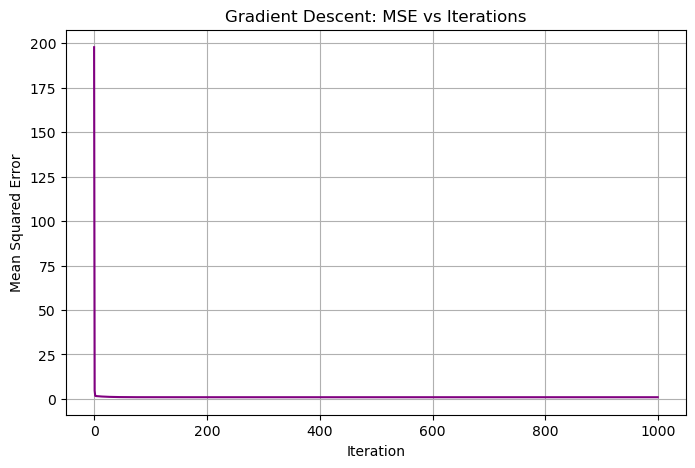

In [7]:
# -----------------------------------
# Step 4: Plot Loss Curve
# -----------------------------------

plt.figure(figsize=(8, 5))
plt.plot(range(iterations), loss_history, color='purple')
plt.title("Gradient Descent: MSE vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


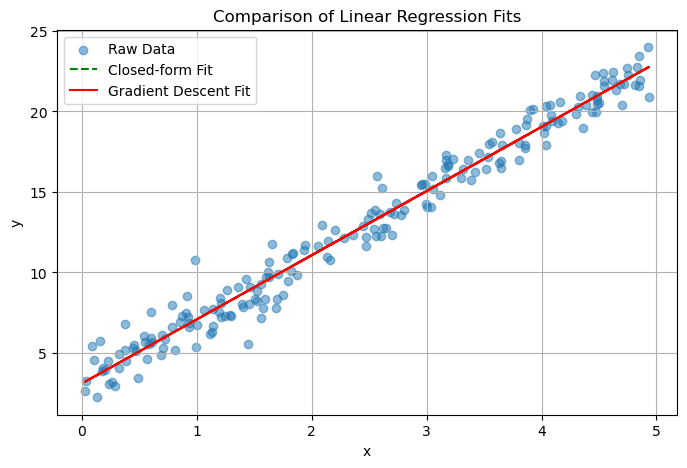

In [9]:
# -----------------------------------
# Step 5: Compare Both Fits
# -----------------------------------

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, label='Raw Data')
plt.plot(x, X @ theta_closed, color='green', linestyle='--', label='Closed-form Fit')
plt.plot(x, X @ theta_gd, color='red', label='Gradient Descent Fit')
plt.title("Comparison of Linear Regression Fits")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Print both solutions for comparison
print("Closed-form Solution:")
print(f"Intercept = {intercept_closed:.4f}, Slope = {slope_closed:.4f}")

print("\nGradient Descent Solution:")
print(f"Intercept = {intercept_gd:.4f}, Slope = {slope_gd:.4f}")


Closed-form Solution:
Intercept = 3.1052, Slope = 3.9844

Gradient Descent Solution:
Intercept = 3.1052, Slope = 3.9844
